In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "darkgrid",color_codes = True)

In [2]:
df = pd.read_csv("D:/Data Sciences/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/Classified Data")

In [3]:
df

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0             0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1             1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2             2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3             3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4             4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   
..          ...       ...       ...       ...       ...       ...       ...   
995         995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240   
996         996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540   
997         997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738   
998         998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859   
999         999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762   

          FDJ       PJF       HQE       NXJ  TARGET CLASS  
0    0.759697  0.643798  0.879422  1.231409             1  
1    0.675334  1.013546  0.621552  1.492702             0  
2    1.626351  1.154483  0.957877  1.285597             0  
3    1.409708  1.380003  1.522692  1.153093             1  
4    1.115596  0.646691  1.463812  1.419167             1  
..        ...       ...       ...       ...           ...  
995  0.746811  0.319752  1.117340  1.348517             1  
996  1.055928  0.713193  0.958684  1.663489             0  
997  0.386802  0.389584  0.919191  1.385504             1  
998  0.855806  1.061338  1.277456  1.188063             1  
999  0.778234  0.907962  1.257190  1.364837             1  

[1000 rows x 12 columns]

In [4]:
df["TARGET CLASS"].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [8]:
scaled_feat = scaler.transform(df.drop("TARGET CLASS",axis=1))

In [9]:
scaled_feat

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
scaled_df = pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [11]:
scaled_df

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0     -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1     -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2     -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3     -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4     -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   
..          ...       ...       ...       ...       ...       ...       ...   
995    1.716463  0.211653 -0.312490  0.065163 -0.259834  0.017567 -1.395721   
996    1.719927 -1.292453 -0.616901  0.369613  0.482648  1.569891  1.273495   
997    1.723391  0.641777 -0.513083 -0.179205  1.022255 -0.539703 -0.229680   
998    1.726856  0.467072 -0.982786 -1.465194 -0.071465  2.368666  0.001269   
999    1.730320 -0.387654 -0.595894 -1.431398  0.512722 -0.402552 -2.026512   

          FDJ       PJF       HQE       NXJ  
0   -0.798951 -1.482368 -0.949719 -0.643314  
1   -1.129797 -0.202240 -1.828051  0.636759  
2    2.599818  0.285707 -0.682494 -0.377850  
3    1.750208  1.066491  1.241325 -1.026987  
4    0.596782 -1.472352  1.040772  0.276510  
..        ...       ...       ...       ...  
995 -0.849486 -2.604264 -0.139347 -0.069602  
996  0.362784 -1.242110 -0.679746  1.473448  
997 -2.261339 -2.362494 -0.814261  0.111597  
998 -0.422041 -0.036777  0.406025 -0.855670  
999 -0.726253 -0.567789  0.336997  0.010350  

[1000 rows x 11 columns]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = scaled_df

In [14]:
y = df["TARGET CLASS"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)

In [20]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       173
           1       0.91      0.91      0.91       157

    accuracy                           0.92       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.92      0.92      0.92       330

[[159  14]
 [ 14 143]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       173
           1       0.91      0.91      0.91       157

    accuracy                           0.92       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.92      0.92      0.92       330



In [24]:
error_rate = []
for i in range(1,40,2):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    pred_i = Knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

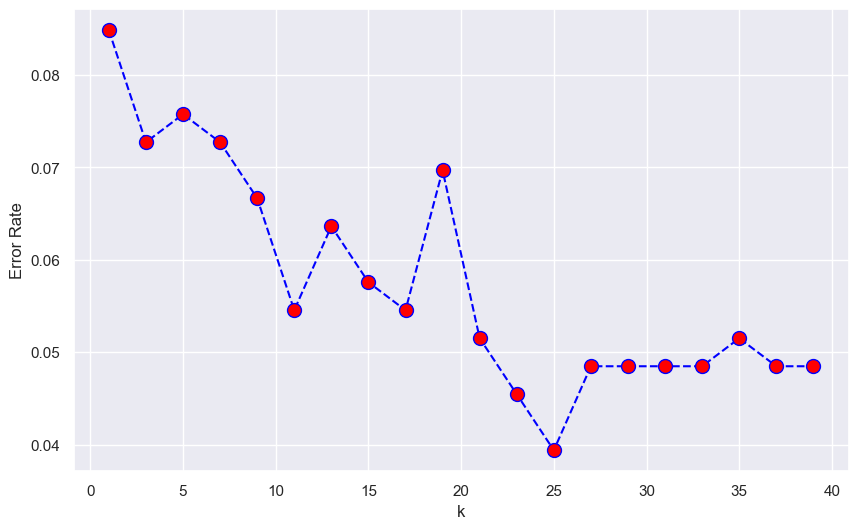

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),error_rate,color ="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.xlabel("k")
plt.ylabel("Error Rate")

In [28]:
knn_new = KNeighborsClassifier(n_neighbors=25)
knn_new.fit(X_test,y_test)
pred_new = knn_new.predict(X_test)
print(classification_report(y_test,pred_new))
print(confusion_matrix(y_test,pred_new))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       173
           1       0.94      0.95      0.94       157

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

[[163  10]
 [  8 149]]


### KNN PROJECT

In [5]:
df = pd.read_csv("D:/Data Sciences/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/KNN_Project_Data")

In [6]:
df

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0    1636.670614   817.988525  2565.995189  358.347163   550.417491   
1    1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2    1300.035501   820.518697  2025.854469  525.562292   922.206261   
3    1059.347542  1066.866418   612.000041  480.827789   419.467495   
4    1018.340526  1313.679056   950.622661  724.742174   843.065903   
..           ...          ...          ...         ...          ...   
995  1343.060600  1289.142057   407.307449  567.564764  1000.953905   
996   938.847057  1142.884331  2096.064295  483.242220   522.755771   
997   921.994822   607.996901  2065.482529  497.107790   457.430427   
998  1157.069348   602.749160  1548.809995  646.809528  1335.737820   
999  1287.150025  1303.600085  2247.287535  664.362479  1132.682562   

            HYKR         EDFS        GUUB         MGJM         JHZC  \
0    1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1    2084.107872   853.404981  447.157619  1193.032521   861.081809   
2    2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3     685.666983   852.867810  341.664784  1154.391368  1450.935357   
4    1370.554164   905.469453  658.118202   539.459350  1899.850792   
..           ...          ...         ...          ...          ...   
995   919.602401   485.269059  668.007397  1124.772996  2127.628290   
996  1703.169782  2007.548635  533.514816   379.264597   567.200545   
997  1577.506205  1659.197738  186.854577   978.340107  1943.304912   
998  1455.504390  2788.366441  552.388107  1264.818079  1331.879020   
999   991.774941  2007.676371  251.916948   846.167511   952.895751   

     TARGET CLASS  
0               0  
1               1  
2               1  
3               0  
4               0  
..            ...  
995             0  
996             1  
997             1  
998             1  
999             1  

[1000 rows x 11 columns]

In [7]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

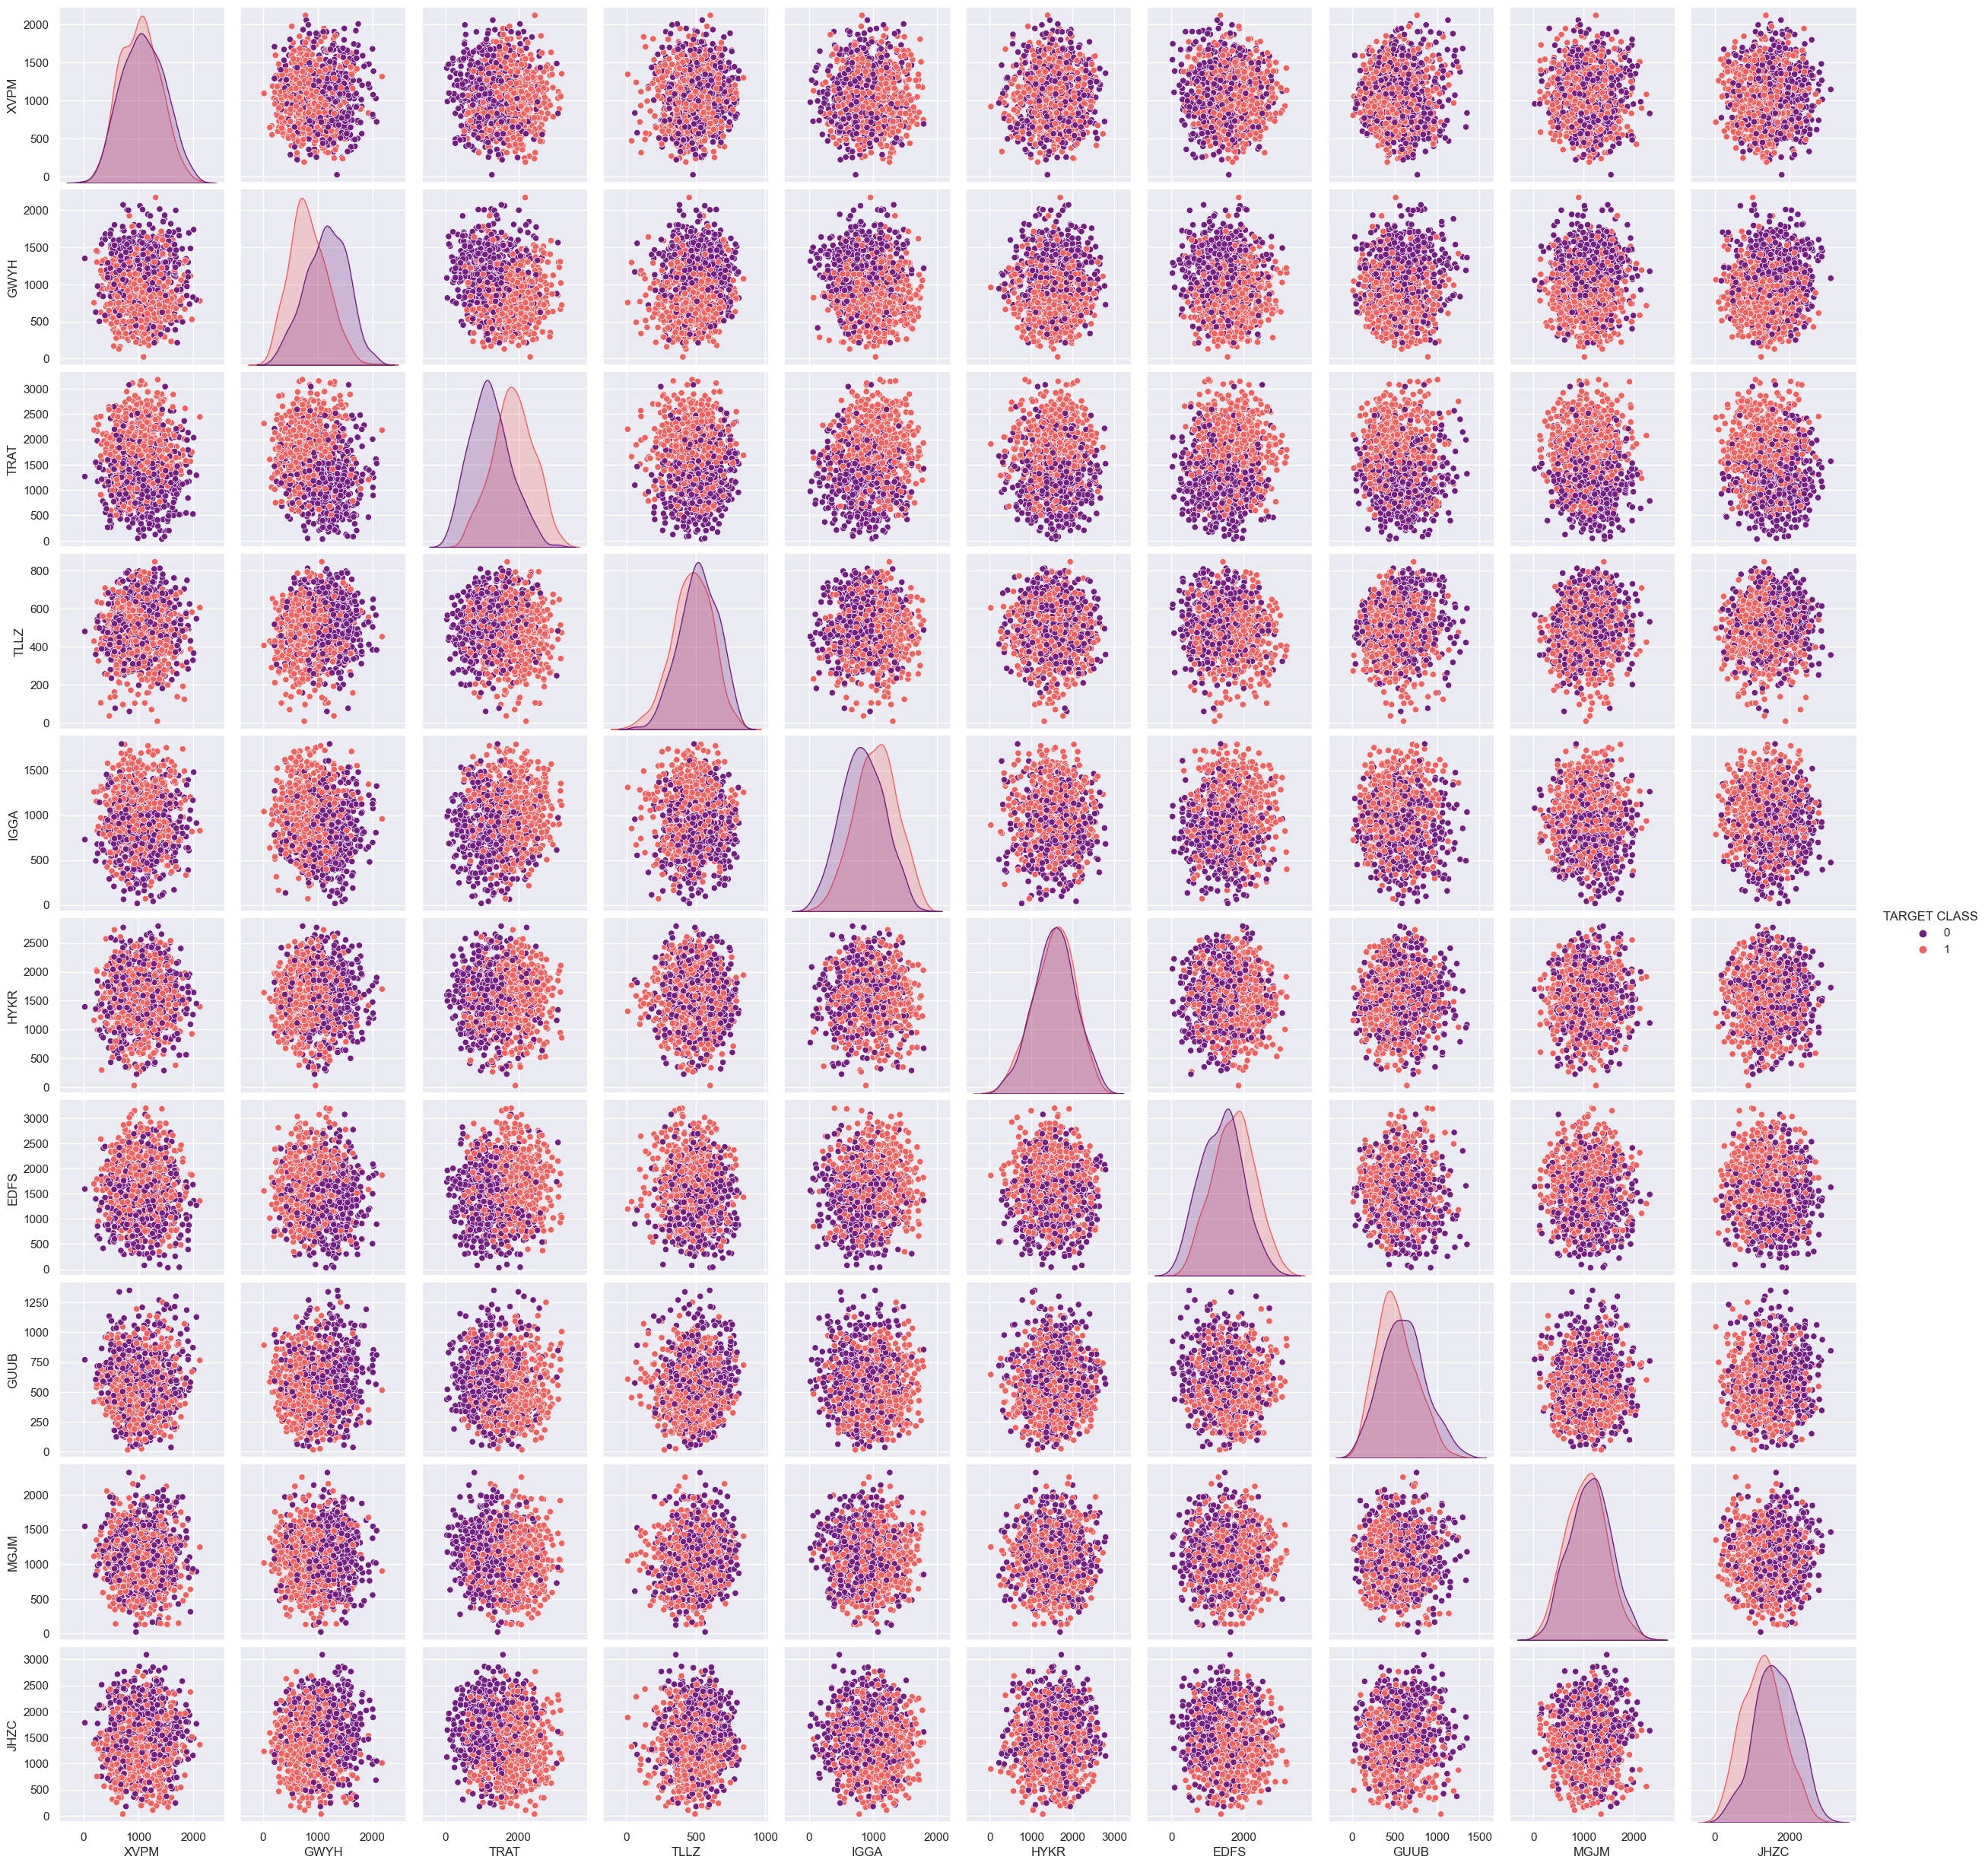

In [11]:
sns.pairplot(df,hue="TARGET CLASS",palette = "magma")

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scale = StandardScaler()

In [16]:
scale.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [17]:
scales_feat = scale.transform(df.drop("TARGET CLASS",axis=1))

In [18]:
scaled_df = pd.DataFrame(scales_feat,columns=df.columns[:-1])
scaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = scaled_df

y = df["TARGET CLASS"] 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred = knn.predict(X_test)

In [26]:
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       162
           1       0.72      0.71      0.72       168

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330

[[115  47]
 [ 48 120]]


Text(0, 0.5, 'Error Rate')

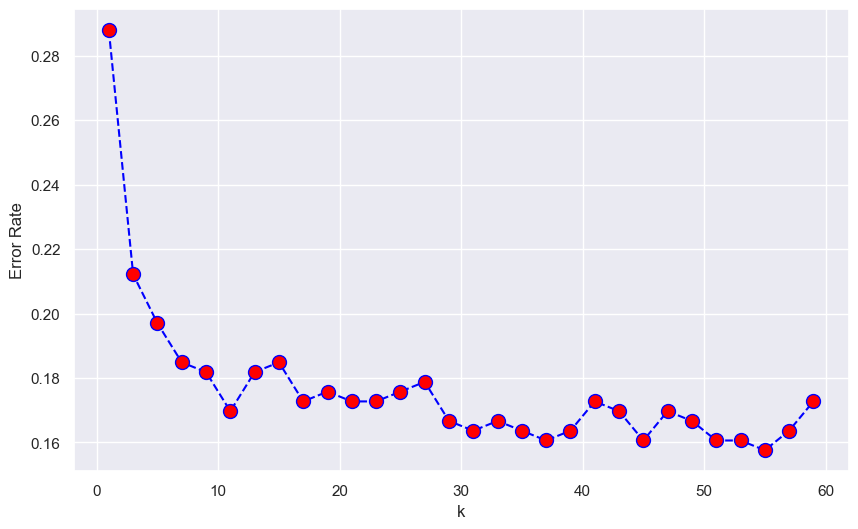

In [32]:
error_rate = []
for i in range(1,60,2):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    pred_i = Knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,60,2),error_rate,color ="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.xlabel("k")
plt.ylabel("Error Rate")

In [33]:
knn_new = KNeighborsClassifier(n_neighbors=35)

In [34]:
knn_new.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [38]:
pred_new =knn_new.predict(X_test)

In [39]:
print(classification_report(y_test,pred_new))
print(confusion_matrix(y_test,pred_new))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       162
           1       0.83      0.85      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

[[133  29]
 [ 25 143]]
